## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Studying the data types in the dataframe
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [4]:
# Display the data table for preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
 #Checking data types in dataframe
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Combining the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Displaying the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
#Checking the size os the dataframe
combined_df.shape

(1893, 8)

In [8]:
# Checking the number of mice.
mice_total = len(combined_df['Mouse ID'].unique())
mice_total

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_time = combined_df.loc[combined_df[['Mouse ID', 'Timepoint']].duplicated(keep=False)] 
duplicated_mice_time['Mouse ID'].unique()

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_ID = combined_df.loc[combined_df['Mouse ID'] == "g989" ] 
duplicated_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduplicated_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
deduplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean_df = len(deduplicated_df['Mouse ID'].unique())
total_mice_clean_df

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_gp =deduplicated_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = round(regimen_gp['Tumor Volume (mm3)'].mean(), 2)
regimen_median = round(regimen_gp['Tumor Volume (mm3)'].median(), 2)
regimen_var = round(regimen_gp['Tumor Volume (mm3)'].var(), 2)
regimen_std = round(regimen_gp['Tumor Volume (mm3)'].std(), 2)
regimen_sem = round(regimen_gp['Tumor Volume (mm3)'].sem(), 2)

# Assemble the resulting series into a single summary dataframe.
stats_summary = pd.DataFrame({'Tumor Volume (mm3) Mean': regimen_mean,\
                             'Tumor Volume (mm3) Median': regimen_median,\
                             'Tumor Volume (mm3) Variance':regimen_var,\
                             'Tumor Volume (mm3) Standard Deviation': regimen_std,\
                             'Tumor Volume (mm3) SEM value': regimen_sem})

stats_summary.sort_values("Tumor Volume (mm3) Mean")

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM value
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Propriva,52.32,50.45,43.85,6.62,0.54
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Zoniferol,53.24,51.82,48.53,6.97,0.52
Placebo,54.03,52.29,61.17,7.82,0.58
Stelasyn,54.23,52.43,59.45,7.71,0.57
Naftisol,54.33,52.51,66.17,8.13,0.60


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#regimen_df =deduplicated_df.groupby('Drug Regimen')
stats_summary2 = regimen_gp['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem']).round(2)
stats_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [30]:
deduplicated_df.sort_values("Timepoint")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
159,s166,0,45.000000,0,Placebo,Male,19,27
160,x773,0,45.000000,0,Placebo,Female,21,30
161,w167,0,45.000000,0,Placebo,Female,6,28
162,t718,0,45.000000,0,Placebo,Female,10,30
...,...,...,...,...,...,...,...,...
1798,c766,45,69.823146,4,Placebo,Female,13,26
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1794,a685,45,66.083066,3,Infubinol,Male,8,30


## Bar and Pie Charts

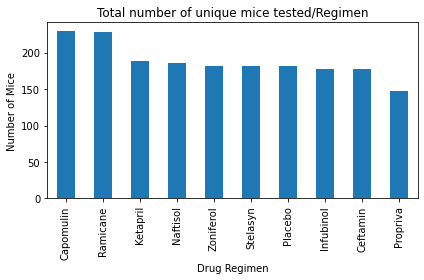

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Note: there is a difference between total number of unique mice and the toatl number of mice tested on each regimen. 
#Note: If looking for the total unique number the `nunique()` should be used instead of `count()` that gives the total mice
mice_nunique = regimen_gp['Mouse ID'].count().sort_values(ascending=False)

mice_nunique_df = pd.DataFrame(mice_nunique)
mice_nunique_df.plot(kind='bar', legend=False)

plt.title("Total number of unique mice tested/Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


In [32]:
#Creating a dataframe with Drug Regimen and Mouse ID only
drug_mouse_df = pd.DataFrame(deduplicated_df[['Drug Regimen','Mouse ID']])
drug_mouse_df = drug_mouse_df.drop_duplicates()
drug_mouse_df

,Drug Regimen,Mouse ID
0,Capomulin,b128
1,Ketapril,f932
2,Ketapril,g107
3,Ketapril,a457
4,Ketapril,c819
...,...,...
245,Capomulin,t565
246,Capomulin,i557
247,Capomulin,m957
248,Capomulin,f966


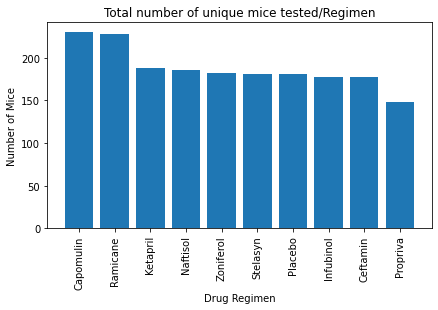

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure()
plt.bar(mice_nunique.index, mice_nunique)
plt.xticks(rotation="vertical")
plt.tight_layout()

# Set a Title and labels
plt.title("Total number of unique mice tested/Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

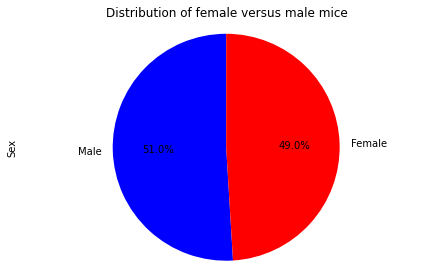

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['b', 'r']
mice_piechart = deduplicated_df['Sex'].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%",  colors=colors)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.tight_layout()
plt.axis("equal")
plt.show()


<ipython-input-35-34dc3802525b>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,


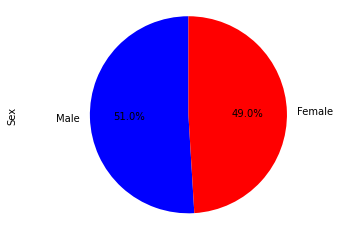

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [deduplicated_df['Sex'].value_counts()]
labels = ["Male", "Female"]
colors = ['b', 'r']
explode = [0, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
#showing de-duplicated dataframe for ease of reference
deduplicated_df.sort_values("Timepoint")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
159,s166,0,45.000000,0,Placebo,Male,19,27
160,x773,0,45.000000,0,Placebo,Female,21,30
161,w167,0,45.000000,0,Placebo,Female,6,28
162,t718,0,45.000000,0,Placebo,Female,10,30
...,...,...,...,...,...,...,...,...
1798,c766,45,69.823146,4,Placebo,Female,13,26
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1794,a685,45,66.083066,3,Infubinol,Male,8,30


In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
regiment_time_gp = deduplicated_df.groupby('Mouse ID')

regiment_time_max_df = pd.DataFrame(regiment_time_gp['Timepoint'].max())
 
regiment_time_max_df = regiment_time_max_df.reset_index()
regiment_time_max_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [39]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_merge = pd.merge(regiment_time_max_df, deduplicated_df, on=['Mouse ID','Timepoint'], how='inner').sort_values('Timepoint')
time_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
21,b447,0,45.000000,0,Ceftamin,Male,2,30
223,x226,0,45.000000,0,Ceftamin,Male,23,28
60,f932,0,45.000000,0,Ketapril,Male,15,29
225,x336,0,45.000000,0,Naftisol,Female,4,29
114,l872,0,45.000000,0,Placebo,Male,19,30
...,...,...,...,...,...,...,...,...
103,k894,45,60.752704,4,Zoniferol,Female,13,29
106,l471,45,67.748662,1,Ceftamin,Female,7,28
108,l509,45,41.483008,3,Capomulin,Male,17,21
76,i177,45,33.562402,3,Ramicane,Male,10,18


In [40]:
#checking dataframe
time_merge['Mouse ID'].unique

<bound method Series.unique of 21     b447
223    x226
60     f932
225    x336
114    l872
       ... 
103    k894
106    l471
108    l509
76     i177
247    z969
Name: Mouse ID, Length: 248, dtype: object>

In [43]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimen_4:
    
    if drug == regimen_4[0]: # Generating plot points on Capomulin
        tumor_capomulin = time_merge['Tumor Volume (mm3)'].loc[time_merge['Drug Regimen'] == drug]
        time_capomulin = time_merge['Timepoint'].loc[time_merge['Drug Regimen'] == drug]
            # Generating plot points for mouse I509 on Capomulin        
        tumor_capomulin_l509 = time_merge['Tumor Volume (mm3)'].loc[(time_merge['Drug Regimen'] == drug)\
                                                                   & (time_merge['Mouse ID'] == "l509")]
        time_capomulin_l509 = time_merge['Timepoint'].loc[(time_merge['Drug Regimen'] == drug)\
                                                                    & (time_merge['Mouse ID'] == "l509")]
        # Generating plot points on Ramicane
    elif drug == regimen_4[1]: 
        tumor_ramicane = time_merge['Tumor Volume (mm3)'].loc[time_merge['Drug Regimen'] == drug]
        mouse_ramicane = time_merge['Mouse ID'].loc[time_merge['Drug Regimen'] == drug]
        
        # Generating plot points on Infubinol
    elif drug == regimen_4[2]:
        tumor_infubinol = time_merge['Tumor Volume (mm3)'].loc[time_merge['Drug Regimen'] == drug]
        mouse_infubinol = time_merge['Mouse ID'].loc[time_merge['Drug Regimen'] == drug]
        
        # Generating plot points on Ceftamin
    elif drug == regimen_4[3]:
        tumor_ceftamin = time_merge['Tumor Volume (mm3)'].loc[time_merge['Drug Regimen'] == drug]
        mouse_ceftamin = time_merge['Mouse ID'].loc[time_merge['Drug Regimen'] == drug]
                                                    
#summary of used variables                                                    
tumor_capomulin
tumor_ramicane
tumor_infubinol
tumor_ceftamin
mouse_ceftamin
                                                    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Calculating quartiles across regimen                                                                                                      
quartiles_capomulin = tumor_capomulin.quantile([.25,.5,.75])   
quartiles_ramicane = tumor_ramicane.quantile([.25,.5,.75])  
quartiles_infubinol = tumor_infubinol.quantile([.25,.5,.75])   
quartiles_ceftamin = tumor_ceftamin.quantile([.25,.5,.75])

   
  
    # Calculating IQR, Lower and Upper bounds for Capomulin
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

    # Calculating IQR, Lower and Upper bounds for Ramicane
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

    # Calculating IQR, Lower and Upper bounds for Infubinol
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

    # Calculating IQR, Lower and Upper bounds for Ceftamin
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

    # Determining outliers using upper and lower bounds
outliers_capomulin = [volume for volume in tumor_capomulin if volume < lower_bound_capomulin or volume > upper_bound_capomulin]
print(f'Results for Capomulin have {len(outliers_capomulin)} potential outliers as follows: {(outliers_capomulin)}')

outliers_ramicane = [volume for volume in tumor_ramicane if volume < lower_bound_ramicane or volume > upper_bound_ramicane]
print(f'Results for Ramicane have {len(outliers_ramicane)} potential outliers as follows:{(outliers_ramicane)}')

outliers_infubinol = [volume for volume in tumor_infubinol if volume < lower_bound_infubinol or volume > upper_bound_infubinol]
print(f'Results for Infubinol has {len(outliers_infubinol)} potential outliers as follows:{(outliers_infubinol)}')

outliers_ceftamin = [volume for volume in tumor_ceftamin if volume < lower_bound_ceftamin or volume > upper_bound_ceftamin]
print(f'Results for Ceftamin have {len(outliers_ceftamin)} potential outliers as follows: {(outliers_ceftamin)}')

Results for Capomulin have 0 potential outliers as follows: []
Results for Ramicane have 0 potential outliers as follows:[]
Results for Infubinol has 1 potential outliers as follows:[36.321345799999996]
Results for Ceftamin have 0 potential outliers as follows: []


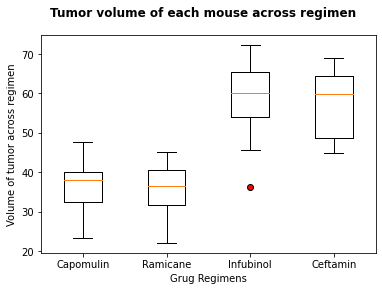

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_capomulin
tumor_ramicane
tumor_infubinol
tumor_ceftamin


fig, (ax1) = plt.subplots()
fig.suptitle("Tumor volume of each mouse across regimen", fontsize=12, fontweight="bold")
ax1.boxplot(x = [tumor_capomulin, tumor_ramicane, tumor_infubinol, tumor_ceftamin],   flierprops=dict(markerfacecolor='r'))
ax1.set_ylabel("Volume of tumor across regimen")
ax1.set_xlabel("Grug Regimens")
plt.xticks([1, 2, 3, 4], regimen_4)
plt.show()

In [51]:
plt.boxplot?


## Line and Scatter Plots

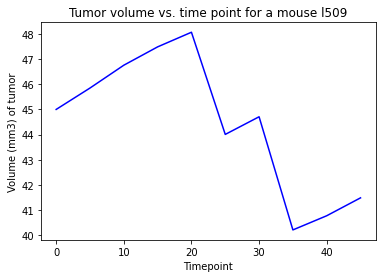

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
a = deduplicated_df['Timepoint'].loc[(deduplicated_df["Mouse ID"]=='l509') & (deduplicated_df["Drug Regimen"] == 'Capomulin') ]
b = deduplicated_df['Tumor Volume (mm3)'].loc[(deduplicated_df["Mouse ID"]=='l509') & (deduplicated_df["Drug Regimen"] == 'Capomulin') ]

mouse_V_T, = plt.plot(a,b,color="blue")
plt.ylabel("Volume (mm3) of tumor")
plt.xlabel("Timepoint")
plt.title('Tumor volume vs. time point for a mouse l509')
plt.show()


In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = deduplicated_df.loc[deduplicated_df['Drug Regimen'] == 'Capomulin' ]
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
weight_mean = Capomulin_gp['Weight (g)']
volume_mean = Capomulin_gp['Tumor Volume (mm3)']
Capomulin_gp.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


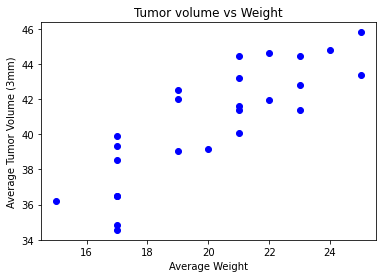

In [63]:
mouse_V_T = plt.scatter(weight_mean, volume_mean, color="blue")
plt.ylabel("Average Tumor Volume (3mm)")
plt.xlabel("Average Weight")
plt.title('Tumor volume vs Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is : 0.84


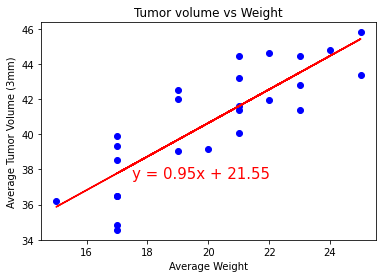

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_mean 
y_values = volume_mean 

mouse_V_T = plt.scatter(weight_mean, volume_mean, color="blue")
plt.ylabel("Average Tumor Volume (3mm)")
plt.xlabel("Average Weight")
plt.title('Tumor volume vs Weight')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17.5,37.5),fontsize=15,color="red")
print(f'The correlation between mouse weight and the average tumor volume is : {round(rvalue, 2)}')
plt.show()

